# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [5]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [6]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


In [7]:
#check for null values
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
transactions = transactions.drop(columns=["nameOrig", "nameDest"])

In [10]:
#calculate descripive statistics
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [11]:
#create a sample db
transactions = transactions.sample(100000)

In [ ]:
#select the feature data
#transactions = transactions_sample[["type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud", "isFlaggedFraud"]]

In [12]:
#list the different cartegories of transactions
transactions["type"].value_counts()

type
CASH_OUT    34835
PAYMENT     33750
CASH_IN     22305
TRANSFER     8454
DEBIT         656
Name: count, dtype: int64

In [13]:

transactions['isFraud'].value_counts()

isFraud
0    99873
1      127
Name: count, dtype: int64

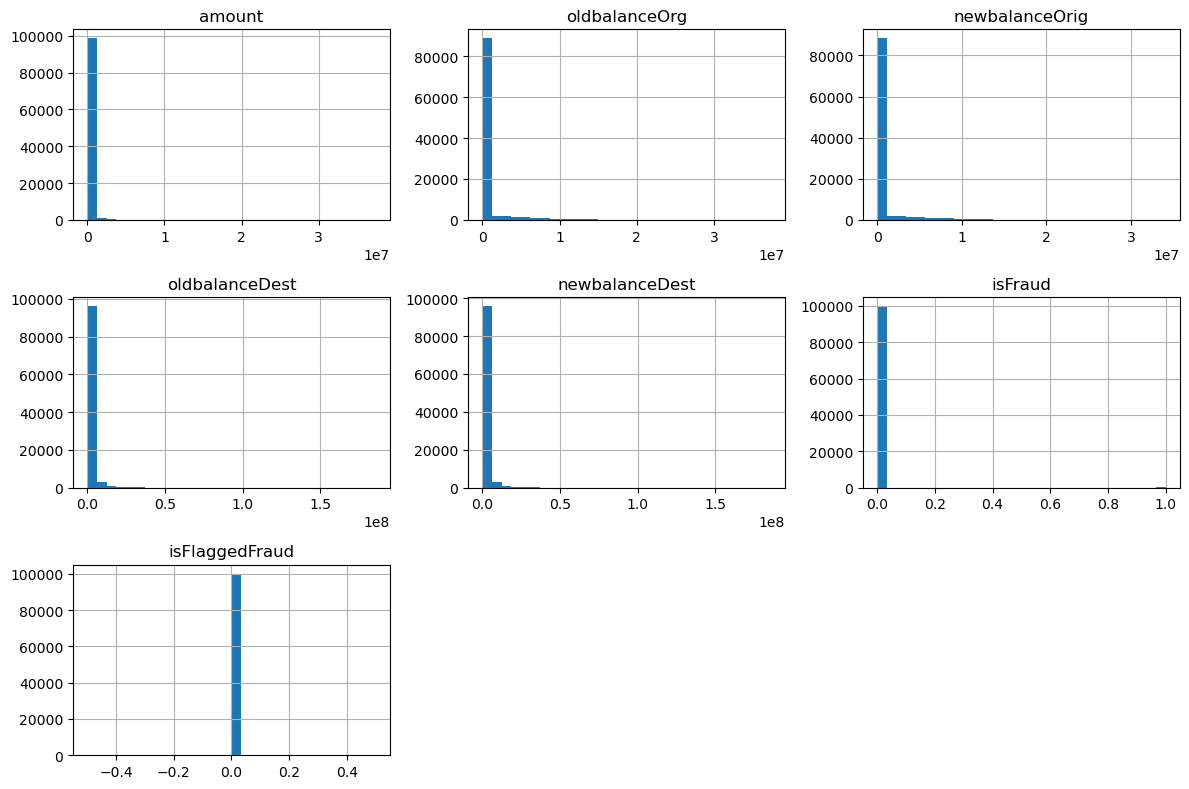

In [14]:
#make a numerical column and plot distributions
num_cols = transactions.select_dtypes(include=['int64', 'float64']).columns
transactions[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

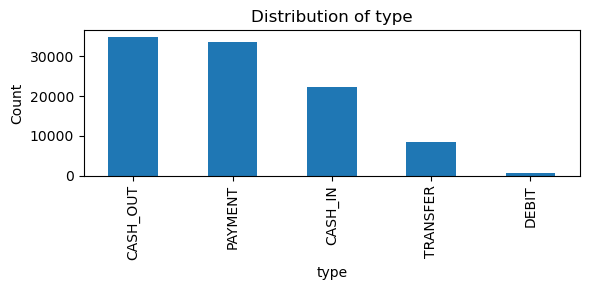

In [ ]:
#number of transacations categorized as fraud vs non-fraud
transactions["isFraud"].value_counts(normalize=True)
cat_cols = transactions.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,3))
    transactions[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

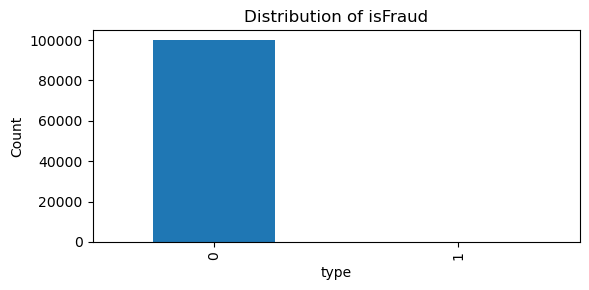

In [ ]:
#number of transactions categorized as fraud
plt.figure(figsize=(6,3))
transactions["isFraud"].value_counts().plot(kind='bar')
plt.title('Distribution of isFraud')
plt.xlabel(col)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<Axes: xlabel='type', ylabel='amount'>

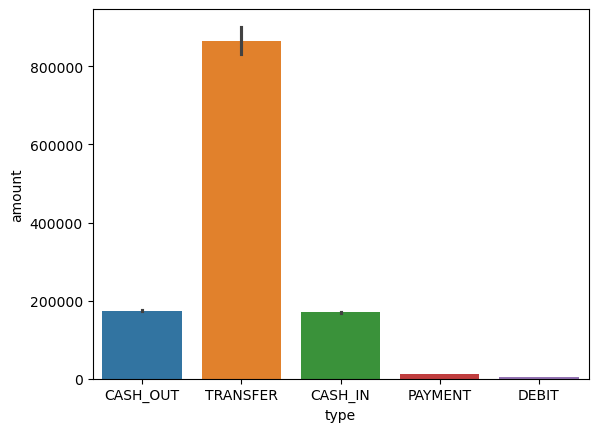

In [22]:
#bar plot for each type of transaction 
sns.barplot(transactions, x="type", y="amount", hue="type")

In [ ]:
#list containg column names
num_col = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [ ]:
#plot histograms for each column showing distribution
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.histplot(transactions[col])
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
for col in num_col:
    plt.figure(figsize=(16,3))
    plt.subplot(1, 2, 1)
    sns.histplot(transactions[col], kde=True, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(data=transactions, x="isFraud", y=col)
    plt.yscale("log")
    plt.title(f"{col} by Fraud Status")
    plt.show()
    

In [ ]:
for col in num_col:
    plt.figure(figsize=(16,3))
    plt.subplot(1, 2, 1)
    sns.histplot(transactions[col], kde=True, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(data=transactions, x=transactions[col])
    plt.xscale("log")
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=transactions, x="isFraud", y=col)
    plt.title(f"{col} by Fraud Status")
    plt.yscale("log")
    plt.show()

In [ ]:

for col in num_col:
    sns.histplot(transactions[transactions["isFraud"]==0][col], color="blue", label="Non-Fraud", bins=50, log_scale=True, alpha=0.5)
    sns.histplot(transactions[transactions["isFraud"]==1][col], color="red", label="Fraud", bins=50, log_scale=True, alpha=0.5)
    plt.legend()
    plt.title("Fraud vs Non-Fraud Amount Distribution (Log Scale)")
    plt.show()

In [ ]:
num_db.describe()

In [ ]:
transactions.corr(numeric_only=True)

In [ ]:
sns.heatmap(num_db.corr(), annot=True)

In [ ]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.scatterplot(data=transactions, x="amount", y=col, hue="type", alpha=0.3)
    plt.title(f"Amount vs {col}")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [ ]:
#["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.scatterplot(data=transactions, x="oldbalanceOrg", y=col, hue="type", alpha=0.3)
    plt.title(f"oldBalanceOrg vs {col}")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

In [ ]:
#["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.scatterplot(data=transactions, x="newbalanceOrig", y=col, hue="type", alpha=0.3)
    plt.title(f"newBalanceOrg vs {col}")
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

In [ ]:
#compare numeric features by fraud and not fraud
plt.figure(figsize=(6,4))
sns.scatterplot(x="amount", y="oldbalanceOrg", hue="isFraud", data=transactions, alpha=0.3)
plt.yscale("log")
plt.xscale("log")
plt.title("Fraud vs Amount vs Origin Balance")
plt.show()

In [ ]:
sns.pairplot(transactions, vars=num_col, hue="isFraud", plot_kws={"alpha":0.3})
plt.yscale("log")
plt.xscale("log")
plt.title(f"Fraud or Not Fraud for {col}")
plt.show()


In [ ]:
transactions['isFraud'].value_counts()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="type", y="amount", data=transactions, hue="isFraud")
plt.yscale("log")
plt.title("Transaction Amount by Type")
plt.xticks(rotation=45)
plt.show()

transactions.groupby("type")["amount"].describe()


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="type", y="amount", hue="isFraud", data=transactions)
plt.yscale("log")
plt.title("Transaction Amounts by Type and Fraud Status")
plt.xticks(rotation=45)
plt.show()

transactions.groupby(["type", "isFraud"])["amount"].mean().unstack()


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here